In [1]:
#importing required library
import pandas as pd

In [5]:
df=pd.read_csv(r"C:\Users\User1\Downloads\archive (3)\Fertility_rate_india.csv")

In [8]:
df

,State,Total,Urban,Rural,Population
0,Andhra,1.7,1.5,1.8,52375124
1,Andman & Nicobar,1.3,1.4,1.2,414057
2,Arunachal Pradesh,1.8,1.4,1.9,1506749
3,Assam,1.9,1.5,1.9,34068394
4,Bihar,3.0,2.4,3.1,117153097
5,Chandigarh,1.4,1.4,1.4,1110820
6,Chhattisgarh,1.8,1.4,1.9,28125421
7,D&D,1.8,1.7,1.9,216981
8,Delhi (NCT),1.6,1.6,2.5,18110349
9,Goa,1.3,1.3,1.4,1521000


# from here the code is solved by problem statements 

# 1. How do fertility rates vary across Indian states, and what regional patterns can be observed?


In [21]:
#lowest fertility rate
sorted = df.sort_values(by='Total')
lfr =sorted.head(5)

,State,Total,Urban,Rural,Population
28,Sikkim,1.1,0.7,1.3,662250
1,Andman & Nicobar,1.3,1.4,1.2,414057
9,Goa,1.3,1.3,1.4,1521000
17,Lakshadweep,1.4,1.4,1.6,70214
5,Chandigarh,1.4,1.4,1.4,1110820


In [26]:
#highest fertility rate
sorted = df.sort_values(by='Total', ascending= False)
hfr = sorted.head(5)

,State,Total,Urban,Rural,Population
4,Bihar,3.0,2.4,3.1,117153097
21,Meghalaya,2.9,1.6,3.3,3230132
32,Uttar Pradesh,2.4,1.9,2.5,224558257
14,Jharkhand,2.3,1.6,2.5,36672687
20,Manipur,2.2,1.8,2.4,2966130


# 2. What is the difference in fertility rates between urban and rural areas in each state?

In [ ]:
# Which states have the largest urban-rural fertility gap


In [42]:
GAP =abs(df['Urban']- df['Rural'])
df['UR_GAP'] = GAP

In [43]:
UR_GAP = df.sort_values(by ='UR_GAP' , ascending = False).head(10)

In [84]:

print(UR_GAP[['State', 'Population', 'Total', 'UR_GAP']])

             State  Population  Total  UR_GAP
21       Meghalaya     3230132    2.9     1.7
14       Jharkhand    36672687    2.3     0.9
8      Delhi (NCT)    18110349    1.6     0.9
23        Nagaland     2158431    1.7     0.8
4            Bihar   117153097    3.0     0.7
28          Sikkim      662250    1.1     0.6
32   Uttar Pradesh   224558257    2.4     0.6
22         Mizoram     1188971    1.9     0.6
20         Manipur     2966130    2.2     0.6
18  Madhya Pradesh    80894777    2.0     0.5


In [ ]:
# DO high population shows low/high fertility rate

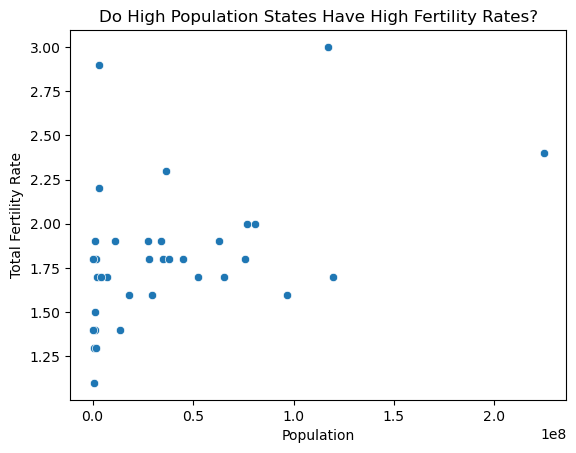

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='Population', y='Total')
plt.title('Do High Population States Have High Fertility Rates?')
plt.xlabel('Population')
plt.ylabel('Total Fertility Rate')
plt.show()


# 3. Which states are at risk of overpopulation or underpopulation based on fertility and population data?

In [ ]:
def classify_risk:
    if row['Total']

In [69]:
def classify_risk(row):
    # Set population threshold (e.g. 5 crore = 50 million)
    high_pop = row['Population'] > 50_000_000  
    
    if row['Total'] > 2.1 and high_pop:
        return '🚨 High Risk: Overpopulated'
    elif row['Total'] > 2.1 and not high_pop:
        return '⚠️ Growing Population'
    elif row['Total'] < 2.1 and high_pop:
        return '⚠️ Aging/Declining (Large State)'
    elif row['Total'] < 2.1 and not high_pop:
        return '🟡 Underpopulation Risk'
    else:
        return 'Stable'



In [70]:
df['Population Risk'] = df.apply(classify_risk, axis=1)


In [74]:
# high population

high_risk_df = df[df['Population Risk'] == '🚨 High Risk: Overpopulated']
print(high_risk_df[['State', 'Population', 'Total', 'Population Risk']])


            State   Population  Total             Population Risk
4           Bihar  117153097.0    3.0  🚨 High Risk: Overpopulated
32  Uttar Pradesh  224558257.0    2.4  🚨 High Risk: Overpopulated


In [75]:
#underpopulation

underpopulation_df = df[df['Population Risk'] == '🟡 Underpopulation Risk']
print(underpopulation_df[['State', 'Population', 'Total', 'Population Risk']])


                State  Population  Total         Population Risk
1    Andman & Nicobar    414057.0    1.3  🟡 Underpopulation Risk
2   Arunachal Pradesh   1506749.0    1.8  🟡 Underpopulation Risk
3               Assam  34068394.0    1.9  🟡 Underpopulation Risk
5          Chandigarh   1110820.0    1.4  🟡 Underpopulation Risk
6        Chhattisgarh  28125421.0    1.8  🟡 Underpopulation Risk
7                 D&D    216981.0    1.8  🟡 Underpopulation Risk
8         Delhi (NCT)  18110349.0    1.6  🟡 Underpopulation Risk
9                 Goa   1521000.0    1.3  🟡 Underpopulation Risk
11            Haryana  27443256.0    1.9  🟡 Underpopulation Risk
12                 HP   7246418.0    1.7  🟡 Underpopulation Risk
13                J&K  13477325.0    1.4  🟡 Underpopulation Risk
16             Kerala  35043531.0    1.8  🟡 Underpopulation Risk
17        Lakshadweep     70214.0    1.4  🟡 Underpopulation Risk
22            Mizoram   1188971.0    1.9  🟡 Underpopulation Risk
23           Nagaland   2

# 4. Which states contribute the most to the national fertility rate average?


In [76]:
# weighted total fertility rate is used to calculate national fertility

df['Weighted_TFR'] = df['Population'] * df['Total']


In [77]:
national_avg = df['Weighted_TFR'].sum() / df['Population'].sum()
print("National Weighted Fertility Rate:", national_avg)


National Weighted Fertility Rate: 2.0142232921184844


In [78]:
# states which have highest contributed in fertility rate 

top_contributors = df.sort_values(by='Weighted_TFR', ascending=False)
print(top_contributors[['State', 'Population', 'Total', 'Weighted_TFR']].head(10))


             State   Population  Total  Weighted_TFR
32   Uttar Pradesh  224558257.0    2.4   538939816.8
4            Bihar  117153097.0    3.0   351459291.0
19     Maharashtra  119581739.0    1.7   203288956.3
18  Madhya Pradesh   80894777.0    2.0   161789554.0
34     West Bengal   96775592.0    1.6   154840947.2
27       Rajasthan   76802294.0    2.0   153604588.0
29      Tamil Nadu   75844451.0    1.8   136520011.8
10         Gujarat   63000000.0    1.9   119700000.0
15       Karnataka   65426566.0    1.7   111225162.2
0           Andhra   52375124.0    1.7    89037710.8


# 5. How does the level of urbanization in a state affect fertility rates?

In [79]:
df['Urbanization %'] = (df['Urban'] / df['Population']) * 100

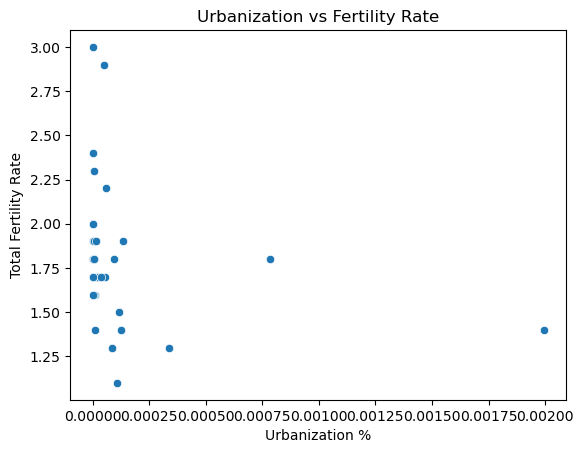

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='Urbanization %', y='Total')
plt.title('Urbanization vs Fertility Rate')
plt.xlabel('Urbanization %')
plt.ylabel('Total Fertility Rate')
plt.show()


In [ ]:
# finding correlation between urbanization and fertility rate

In [82]:
correlation = df['Urbanization %'].corr(df['Total'])
print("Correlation between Urbanization and Fertility Rate:", correlation)


Correlation between Urbanization and Fertility Rate: -0.23484523446141004
